<a href="https://www.kaggle.com/code/yassinhabib/spam-detection?scriptVersionId=197205770" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# NLTK Library for Natural Language Processing
import nltk
from nltk.corpus import stopwords
nltk.download('all')


#PorterStemmer for Stemming the Words
from nltk.stem.porter import PorterStemmer

# Precompute stopwords set
stop_words = set(stopwords.words('english'))


from nltk.stem import WordNetLemmatizer

# RE Library for Regular Expression
import re

#import the function for splitting the data into testing and training
from sklearn.model_selection import train_test_split

#import the models to use

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

#saving models
import joblib

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron

In [2]:
spam_dataset = pd.read_csv("/kaggle/input/spam-mails-dataset/spam_ham_dataset.csv")
type(spam_dataset)

pandas.core.frame.DataFrame

In [3]:
print(len(spam_dataset))
print(np.shape(spam_dataset))
#pd.set_option("display.max.columns", None) #force to show the maximum of columns on the screen
spam_dataset.head()

5171
(5171, 4)


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
spam_dataset_treated=spam_dataset.drop(['Unnamed: 0'],axis=1,inplace=False)
spam_dataset_treated.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


## Displaying Data types

In [5]:
spam_dataset_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5171 non-null   object
 1   text       5171 non-null   object
 2   label_num  5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [6]:
# check missing values
print(spam_dataset_treated.isna().sum())
#Describing the dataset
spam_dataset_treated.describe()

label        0
text         0
label_num    0
dtype: int64


,label_num
count,5171.000000
mean,0.289886
std,0.453753
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [7]:
#Checking if the data is unbalanced
spam_dataset_treated['label_num'].value_counts()

label_num
0    3672
1    1499
Name: count, dtype: int64

<Axes: xlabel='label'>

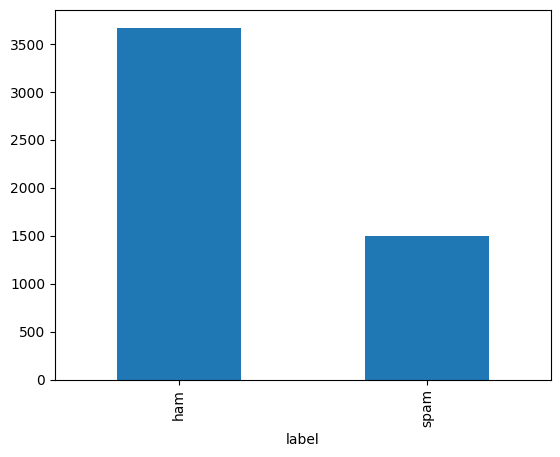

In [8]:
spam_dataset_treated['label'].value_counts().plot.bar()

## Text preprocessing

In [9]:
# create a list text
text = list(spam_dataset_treated['text'])



# Initialize the WordNet Lemmatizer for lemmatization
st = PorterStemmer()



#List where we store the results
processed_text = []




for i in range(len(text)):

    a = re.sub('[^a-zA-Z]', ' ', text[i]) #remove  all non-alphabetic characteres

    a = a.lower() # lowercase

    a = a.split() #split into words

    a = [st.stem(word) for word in a if word not in stop_words] #remove stop words: is, and...

   # a = [st.stem(word) for word in a] #Converts each word to its base or root form (ex: "running" to "run").

    a = ' '.join(a) #  # Join the list of words back into a single string


    processed_text.append(a)

spam_dataset_treated['text']=processed_text
spam_dataset_treated.head()

,label,text,label_num
0,ham,subject enron methanol meter follow note gave ...,0
1,ham,subject hpl nom januari see attach file hplnol...,0
2,ham,subject neon retreat ho ho ho around wonder ti...,0
3,spam,subject photoshop window offic cheap main tren...,1
4,ham,subject indian spring deal book teco pvr reven...,0


# Splitting the dataset

In [10]:
X=spam_dataset_treated['text']
Y=spam_dataset_treated['label']

## Vectorization

In [11]:
# Create an instance of CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(X)  # Transform the text data

# Model Training and Evaluation


In [12]:
# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_cv, Y, train_size=0.75, random_state=42)

### Model1:Logistic regression

#### I.1.Implementation of logistic regression

In [13]:
# Instantiate the Logistic Regression model
logreg = LogisticRegression()

# Fit the model with training data
logreg.fit(X_train, Y_train)

LogisticRegression()

In [14]:
# Generate predictions
predictions = logreg.predict(X_test)
print(predictions)

['ham' 'spam' 'ham' ... 'ham' 'ham' 'ham']


#### I.2.Evaluate Model Performance

In [15]:
# Confusion Matrix and Accuracy for Logistic Regression
conf_matrix_logreg = confusion_matrix(Y_test, predictions)
# Confusion matrix as DataFrame for Logistic Regression
df_logreg = pd.DataFrame(conf_matrix_logreg, index=['ham','spam'], columns=['ham','spam'])
print("\nConfusion Matrix for Logistic Regression as DataFrame:")
print(df_logreg)

# Accuracy for Logistic Regression
accuracy_logreg = metrics.accuracy_score(Y_test, predictions)
print(f"\nAccuracy for Logistic Regression: {accuracy_logreg:.2f}")




Confusion Matrix for Logistic Regression as DataFrame:
      ham  spam
ham   915    15
spam   13   350

Accuracy for Logistic Regression: 0.98


## Other models

In [16]:
# 2nd model: Random Forest
rd_frst = RandomForestClassifier()
rd_frst.fit(X_train, Y_train)

# 3rd model: Decision Tree Classification
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

# Generate predictions
yrnd_pred = rd_frst.predict(X_test)  # fixed the variable name from rnd_clf to rd_frst
ydt_pred = decision_tree.predict(X_test)

# Confusion Matrix for Random Forest
cnf_matrix_rd = metrics.confusion_matrix(Y_test, yrnd_pred)
df_rd = pd.DataFrame(cnf_matrix_rd, index=['ham','spam'], columns=['ham','spam'])
print("\nConfusion Matrix for Logistic Regression as DataFrame:")
print(df_rd)


# Accuracy for Random Forest
accuracy_rd = metrics.accuracy_score(Y_test, yrnd_pred)
print(f"Accuracy for Random Forest: {accuracy_rd:.2f}")

# Confusion Matrix for Decision Tree
cnf_matrix_dt = metrics.confusion_matrix(Y_test, ydt_pred)

df_dt = pd.DataFrame(cnf_matrix_dt, index=['ham','spam'], columns=['ham','spam'])
print("\nConfusion Matrix for Decision tree as DataFrame:")
print(df_dt)

# Accuracy for Decision Tree
accuracy_dt = metrics.accuracy_score(Y_test, ydt_pred)
print(f"Accuracy for Decision Tree: {accuracy_dt:.2f}")



Confusion Matrix for Logistic Regression as DataFrame:
      ham  spam
ham   912    18
spam   15   348
Accuracy for Random Forest: 0.97

Confusion Matrix for Decision tree as DataFrame:
      ham  spam
ham   889    41
spam   28   335
Accuracy for Decision Tree: 0.95


In [17]:
# Save the models to files
joblib.dump(logreg, 'logistic_regression_model.pkl')
joblib.dump(rd_frst, 'random_forest_model.pkl')
joblib.dump(decision_tree, 'decision_tree_model.pkl')

print("\nModels saved to files successfully.")


Models saved to files successfully.
